In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("data.csv")
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')

In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138725 entries, 0 to 138724
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           138725 non-null  float64
 1   year              138725 non-null  int64  
 2   acousticness      138725 non-null  float64
 3   artists           138725 non-null  object 
 4   danceability      138725 non-null  float64
 5   duration_ms       138725 non-null  int64  
 6   energy            138725 non-null  float64
 7   explicit          138724 non-null  float64
 8   id                138724 non-null  object 
 9   instrumentalness  138724 non-null  float64
 10  key               138724 non-null  float64
 11  liveness          138724 non-null  float64
 12  loudness          138724 non-null  float64
 13  mode              138724 non-null  float64
 14  name              138724 non-null  object 
 15  popularity        138724 non-null  float64
 16  release_date      13

In [ ]:
print(genre_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [ ]:
print(year_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


<Axes: xlabel='count', ylabel='decade'>

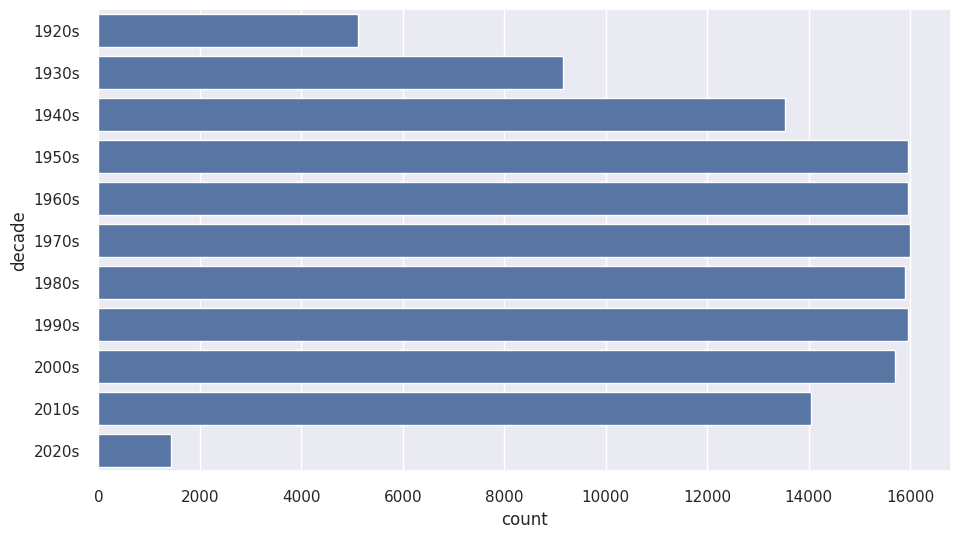

In [ ]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

In [ ]:
!pip install spotipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 9.5 MB/s eta 0:00:00


In [ ]:
import os

# Set Spotify client ID and client secret as environment variables
os.environ["SPOTIFY_CLIENT_ID"] = "26de703b191b47118c0736deb44f8594"
os.environ["SPOTIFY_CLIENT_SECRET"] = "f4fe8080cecc4a87b456855028fba0a1"

# Your Spotify API code here...


In [ ]:
client_id = os.environ.get("SPOTIFY_CLIENT_ID")
client_secret = os.environ.get("SPOTIFY_CLIENT_SECRET")

# Check if client_id and client_secret are None or empty strings
if client_id is None or client_id == "" or client_secret is None or client_secret == "":
    raise ValueError("SPOTIFY_CLIENT_ID or SPOTIFY_CLIENT_SECRET environment variables are not set.")

# Create the Spotify client using Spotipy
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Example usage: Search for a track
track_name = "Shape of You"  # Example track name
results = sp.search(q=track_name, limit=1)

# Process search results
if results and 'tracks' in results and 'items' in results['tracks'] and len(results['tracks']['items']) > 0:
    track = results['tracks']['items'][0]
    print("Track Name:", track['name'])
    print("Artist:", ", ".join([artist['name'] for artist in track['artists']]))
    print("Album:", track['album']['name'])
    print("Preview URL:", track['preview_url'])
else:
    print("Track not found.")


Track Name: Shape of You
Artist: Ed Sheeran
Album: ÷ (Deluxe)
Preview URL: https://p.scdn.co/mp3-preview/7339548839a263fd721d01eb3364a848cad16fa7?cid=26de703b191b47118c0736deb44f8594


In [ ]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Set Spotify client ID and client secret as environment variables
os.environ["SPOTIFY_CLIENT_ID"] = "26de703b191b47118c0736deb44f8594"
os.environ["SPOTIFY_CLIENT_SECRET"] = "f4fe8080cecc4a87b456855028fba0a1"

# Create the Spotify client
client_id = os.environ.get("SPOTIFY_CLIENT_ID")
client_secret = os.environ.get("SPOTIFY_CLIENT_SECRET")

# Check if client_id and client_secret are None or empty strings
if client_id is None or client_id == "" or client_secret is None or client_secret == "":
    raise ValueError("SPOTIFY_CLIENT_ID or SPOTIFY_CLIENT_SECRET environment variables are not set.")

# Create the Spotify client using Spotipy
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Example usage: Get detailed information about an artist
artist_name = "Ed Sheeran"  # Example artist name
results = sp.search(q=artist_name, limit=1, type='artist')

# Process artist search results
if results and 'artists' in results and 'items' in results['artists'] and len(results['artists']['items']) > 0:
    artist = results['artists']['items'][0]
    print("Artist Name:", artist['name'])
    print("Genres:", ", ".join(artist['genres']))
    print("Followers:", artist['followers']['total'])
    print("Popularity:", artist['popularity'])

    # Get the artist's top tracks
    top_tracks = sp.artist_top_tracks(artist['id'], country='US')  # Replace 'US' with desired country code
    if top_tracks and 'tracks' in top_tracks and len(top_tracks['tracks']) > 0:
        print("\nTop Tracks:")
        for track in top_tracks['tracks']:
            print("- Track:", track['name'])
            print("  Album:", track['album']['name'])
            print("  Popularity:", track['popularity'])
    else:
        print("\nTop tracks not found for the artist.")
else:
    print("Artist not found.")



Artist Name: Ed Sheeran
Genres: pop, singer-songwriter pop, uk pop
Followers: 113546865
Popularity: 87

Top Tracks:
- Track: Perfect
  Album: ÷ (Deluxe)
  Popularity: 87
- Track: Shape of You
  Album: ÷ (Deluxe)
  Popularity: 86
- Track: Photograph
  Album: x (Wembley Edition)
  Popularity: 65
- Track: Shivers
  Album: =
  Popularity: 84
- Track: Thinking out Loud
  Album: x (Wembley Edition)
  Popularity: 65
- Track: Bad Habits
  Album: =
  Popularity: 81
- Track: Eyes Closed
  Album: - (Deluxe)
  Popularity: 80
- Track: Bam Bam (feat. Ed Sheeran)
  Album: Familia
  Popularity: 73
- Track: Castle on the Hill
  Album: ÷ (Deluxe)
  Popularity: 79
- Track: Galway Girl
  Album: ÷ (Deluxe)
  Popularity: 79


In [1]:

from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):

    try:
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data

    except IndexError:
        return find_song(song['name'], song['year'])


def get_mean_vector(song_list, spotify_data):

    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [4]:
data = [
    {'name': 'Come As You Are', 'year': 1991, 'artist': 'Nirvana'},
    {'name': 'Smells Like Teen Spirit', 'year': 1991, 'artist': 'Nirvana'},
    {'name': 'Lithium', 'year': 1992, 'artist': 'Nirvana'},
    {'name': 'All Apologies', 'year': 1993, 'artist': 'Nirvana'},
    {'name': 'Stay Away', 'year': 1993, 'artist': 'Nirvana'},
    {'name': 'Bohemian Rhapsody', 'year': 1975, 'artist': 'Queen'},
    {'name': 'We Will Rock You', 'year': 1977, 'artist': 'Queen'},
    {'name': 'Another One Bites the Dust', 'year': 1980, 'artist': 'Queen'},
    {'name': 'Radio Ga Ga', 'year': 1984, 'artist': 'Queen'},
    {'name': 'Under Pressure', 'year': 1981, 'artist': 'Queen ft. David Bowie'},
    {'name': 'Billie Jean', 'year': 1982, 'artist': 'Michael Jackson'},
    {'name': 'Thriller', 'year': 1982, 'artist': 'Michael Jackson'},
    {'name': 'Smooth Criminal', 'year': 1987, 'artist': 'Michael Jackson'},
    {'name': 'Beat It', 'year': 1982, 'artist': 'Michael Jackson'},
    {'name': 'Black or White', 'year': 1991, 'artist': 'Michael Jackson'},
    {'name': 'Hotel California', 'year': 1976, 'artist': 'Eagles'},
    {'name': 'Take It Easy', 'year': 1972, 'artist': 'Eagles'},
    {'name': 'Desperado', 'year': 1973, 'artist': 'Eagles'},
    {'name': 'Hotel California (Live)', 'year': 1994, 'artist': 'Eagles'},
    {'name': 'One of These Nights', 'year': 1975, 'artist': 'Eagles'},
]


In [6]:
def get_song_data(song, spotify_data):
    for item in spotify_data:
        if item['name'] == song['name'] and item['year'] == song['year']:
            return item
    return None  # Return None if song data is not found in spotify_data
